In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn
from sklearn import preprocessing
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.


In [2]:
df=pd.read_csv('fas_data_ALLDUR.csv')

In [3]:
print(df.columns.tolist())

['Unnamed: 0', 'index', 'D5_75_', 'D20_80_', 'D5_95_', 'f_0.1', 'f_0.106', 'f_0.112', 'f_0.118', 'f_0.125', 'f_0.132', 'f_0.14', 'f_0.148', 'f_0.156', 'f_0.165', 'f_0.175', 'f_0.185', 'f_0.195', 'f_0.206', 'f_0.218', 'f_0.231', 'f_0.244', 'f_0.258', 'f_0.273', 'f_0.289', 'f_0.305', 'f_0.323', 'f_0.341', 'f_0.361', 'f_0.381', 'f_0.403', 'f_0.426', 'f_0.451', 'f_0.477', 'f_0.504', 'f_0.533', 'f_0.563', 'f_0.596', 'f_0.63', 'f_0.666', 'f_0.704', 'f_0.745', 'f_0.787', 'f_0.833', 'f_0.88', 'f_0.931', 'f_0.984', 'f_1.041', 'f_1.1', 'f_1.163', 'f_1.23', 'f_1.301', 'f_1.375', 'f_1.454', 'f_1.538', 'f_1.626', 'f_1.719', 'f_1.818', 'f_1.922', 'f_2.032', 'f_2.149', 'f_2.272', 'f_2.402', 'f_2.54', 'f_2.686', 'f_2.84', 'f_3.003', 'f_3.175', 'f_3.357', 'f_3.55', 'f_3.753', 'f_3.969', 'f_4.196', 'f_4.437', 'f_4.691', 'f_4.96', 'f_5.245', 'f_5.546', 'f_5.864', 'f_6.2', 'f_6.556', 'f_6.932', 'f_7.329', 'f_7.75', 'f_8.194', 'f_8.664', 'f_9.161', 'f_9.687', 'f_10.242', 'f_10.83', 'f_11.451', 'f_12.108', 

In [4]:
df.dropna(axis=0,inplace=True)
df.shape

(106982, 106)

In [5]:
input_var=df[['D5_95_', 'f_0.1', 'f_0.106', 'f_0.112', 'f_0.118', 'f_0.125', 'f_0.132', 'f_0.14', 'f_0.148',
                      'f_0.156', 'f_0.165', 'f_0.175', 'f_0.185', 'f_0.195', 'f_0.206', 'f_0.218', 'f_0.231', 'f_0.244',
                      'f_0.258', 'f_0.273', 'f_0.289', 'f_0.305', 'f_0.323', 'f_0.341', 'f_0.361', 'f_0.381', 'f_0.403',
                      'f_0.426', 'f_0.451', 'f_0.477', 'f_0.504', 'f_0.533', 'f_0.563', 'f_0.596', 'f_0.63', 'f_0.666', 
                      'f_0.704', 'f_0.745', 'f_0.787', 'f_0.833', 'f_0.88', 'f_0.931', 'f_0.984', 'f_1.041', 'f_1.1',
                      'f_1.163', 'f_1.23', 'f_1.301', 'f_1.375', 'f_1.454', 'f_1.538', 'f_1.626', 'f_1.719', 'f_1.818', 
                      'f_1.922', 'f_2.032', 'f_2.149', 'f_2.272', 'f_2.402', 'f_2.54', 'f_2.686', 'f_2.84', 'f_3.003',
                      'f_3.175', 'f_3.357', 'f_3.55', 'f_3.753', 'f_3.969', 'f_4.196', 'f_4.437', 'f_4.691', 'f_4.96', 
                      'f_5.245', 'f_5.546', 'f_5.864', 'f_6.2', 'f_6.556', 'f_6.932', 'f_7.329', 'f_7.75', 'f_8.194',
                      'f_8.664', 'f_9.161', 'f_9.687', 'f_10.242', 'f_10.83', 'f_11.451', 'f_12.108', 'f_12.802', 'f_13.536', 
                      'f_14.313', 'f_15.134', 'f_16.002', 'f_16.92', 'f_17.89', 'f_18.916', 'f_20.001', 'f_21.148', 'f_22.361',
                      'f_23.644', 'f_25.0']]

In [6]:
y_var=df[['pga']]
y_var=np.log(y_var)
y_var=np.array(y_var)
y_var

array([[0.24216156],
       [0.30821972],
       [0.35627486],
       ...,
       [0.31626953],
       [1.95132404],
       [0.95896701]])

In [7]:
X_train, X_test, y_train, y_test=train_test_split(input_var,y_var,test_size=0.2)

In [8]:
model=Sequential([Dense(units=50, input_shape=(101,), activation='tanh'),
                  
                  Dense(units=1, activation='linear')])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                5100      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 5,151
Trainable params: 5,151
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error')

Train on 77026 samples, validate on 8559 samples
Epoch 1/50
77026/77026 [==============================] - 2s 21us/step - loss: 0.2706 - val_loss: 0.0973
Epoch 2/50
77026/77026 [==============================] - 1s 19us/step - loss: 0.0867 - val_loss: 0.0833
Epoch 3/50
77026/77026 [==============================] - 1s 18us/step - loss: 0.0690 - val_loss: 0.0668
Epoch 4/50
77026/77026 [==============================] - 2s 20us/step - loss: 0.0639 - val_loss: 0.0556
Epoch 5/50
77026/77026 [==============================] - 1s 18us/step - loss: 0.0620 - val_loss: 0.0675
Epoch 6/50
77026/77026 [==============================] - 1s 19us/step - loss: 0.0597 - val_loss: 0.0547
Epoch 7/50
77026/77026 [==============================] - 1s 18us/step - loss: 0.0579 - val_loss: 0.0594
Epoch 8/50
77026/77026 [==============================] - 1s 18us/step - loss: 0.0579 - val_loss: 0.0510
Epoch 9/50
77026/77026 [==============================] - 1s 18us/step - loss: 0.0574 - val_loss: 0.0499
Epoch 

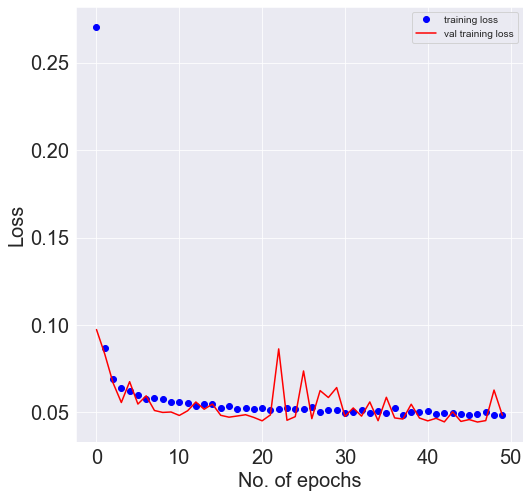

In [11]:
history=model.fit(X_train, y_train,batch_size=128, epochs=50, validation_split=0.1, verbose=1)
history_dict=history.history
    
loss_values= history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure(figsize=(8,8))
plt.style.use('seaborn-pastel')
sns.color_palette("rocket")
sns.set_style("darkgrid")
    
plt.plot(loss_values, 'bo', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')
plt.legend(fontsize=10)


plt.ylabel('Loss' ,fontsize=20)
plt.xlabel('No. of epochs', fontsize=20)


plt.tick_params(axis='both', which='major', labelsize=20)


In [12]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

print('R2 score on train set is :\t{:0.3f}'.format(r2_score(y_train, y_train_pred)))
print('R2 score on test set is :\t{:0.3f}'.format(r2_score(y_test, y_test_pred)))

R2 score on train set is :	0.969
R2 score on test set is :	0.968


Text(0.5, 1.0, 'SIG_DUR_5_95')

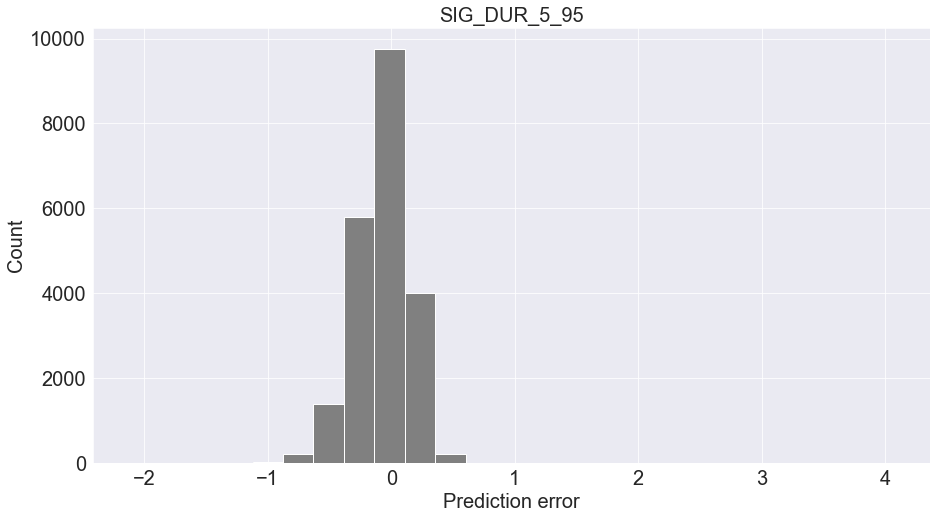

In [13]:
error=y_test_pred-y_test
plt.figure(figsize=(15,8))
plt.hist(error, bins=25, color='grey')

plt.xlabel('Prediction error',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('SIG_DUR_5_95', fontsize=20)


<Figure size 432x288 with 0 Axes>

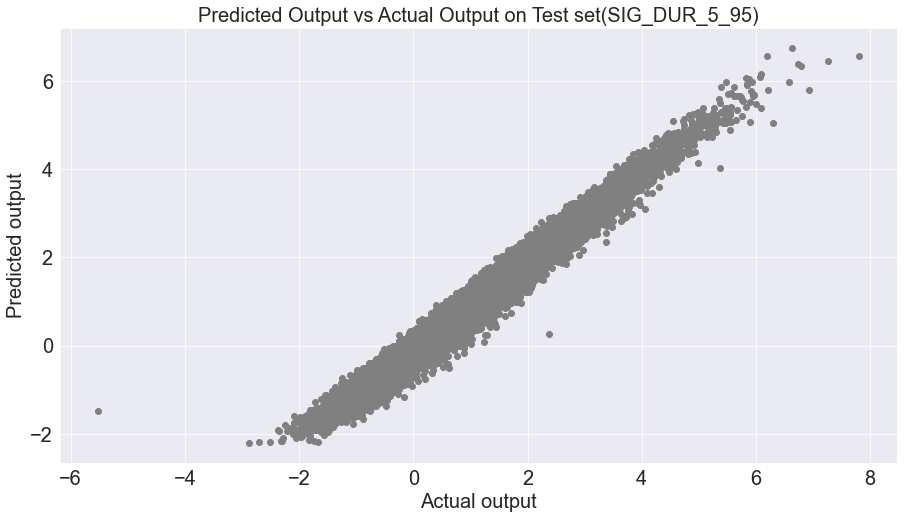

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(15,8))
plt.plot(y_test, y_test_pred, 'o', color='grey')
plt.xlabel('Actual output',fontsize=20)
plt.ylabel('Predicted output',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Predicted Output vs Actual Output on Test set(SIG_DUR_5_95)', fontsize=20)

plt.figure()

In [15]:
y_test.shape

(21397, 1)

In [16]:
X_data=np.array((input_var))
X_data

array([[3.06650000e+01, 3.29022890e-05, 5.48283990e-05, ...,
        1.06298002e-04, 7.80235633e-05, 5.16962475e-05],
       [4.15550000e+01, 2.30889188e-05, 2.73595781e-05, ...,
        3.24771218e-05, 2.97820103e-05, 2.78276805e-05],
       [9.92000000e+00, 1.61156282e-06, 1.65677032e-06, ...,
        6.04951579e-05, 4.41795273e-05, 3.73364744e-05],
       ...,
       [1.50900000e+01, 2.78263762e-07, 2.57601926e-07, ...,
        4.36379358e-04, 4.03919392e-04, 3.47938418e-04],
       [8.14000000e+00, 1.40131040e-06, 2.52566563e-06, ...,
        1.59799663e-03, 1.43400443e-03, 1.23692654e-03],
       [1.69800000e+01, 1.27957699e-06, 1.77005945e-06, ...,
        2.38561832e-04, 2.53787574e-04, 1.78536851e-04]])

In [17]:
y_pred=model.predict(X_data)
y_pred

array([[ 0.15026058],
       [-0.0584986 ],
       [ 0.5489664 ],
       ...,
       [ 0.56512713],
       [ 1.8556488 ],
       [ 0.755981  ]], dtype=float32)

In [18]:
output_y=df[['pga']]
output_y=np.log(output_y)
output_y

,pga
0,0.242162
1,0.308220
2,0.356275
3,-0.455706
4,0.473747
...,...
106977,0.985070
106978,0.409457
106979,0.316270
106980,1.951324


In [19]:
residual=output_y-y_pred
residual

,pga
0,0.091901
1,0.366718
2,-0.192692
3,0.161999
4,0.397958
...,...
106977,0.232907
106978,0.014195
106979,-0.248858
106980,0.095675


In [20]:
dur=input_var['D5_95_']

In [21]:
calc=pd.concat([dur,residual], axis=1)
calc

,D5_95_,pga
0,30.665,0.091901
1,41.555,0.366718
2,9.920,-0.192692
3,21.410,0.161999
4,42.955,0.397958
...,...,...
106977,13.260,0.232907
106978,17.760,0.014195
106979,15.090,-0.248858
106980,8.140,0.095675


In [22]:
a=[]
for i in range(0,140,5):
    b=calc[(calc.D5_95_ >= i ) & (calc.D5_95_ <=i+5)].pga.mean()
    a.append(b)
    
a=np.array(a)
a

print(a)
print(len(a))

[0.05163511 0.05023418 0.05207504 0.05781211 0.06073944 0.06306234
 0.06968204 0.07384624 0.07630151 0.08316496 0.0844515  0.10820483
 0.1044697  0.12140627 0.12519174 0.16156363 0.15364703 0.1817133
 0.18928025 0.16320268 0.28239913 0.19279428 0.16036807 0.16591476
 0.22875653 0.26166495 0.23955287 0.38069027]
28


In [23]:
c=[]
for i in range(0,140,5):
    c.append(i)

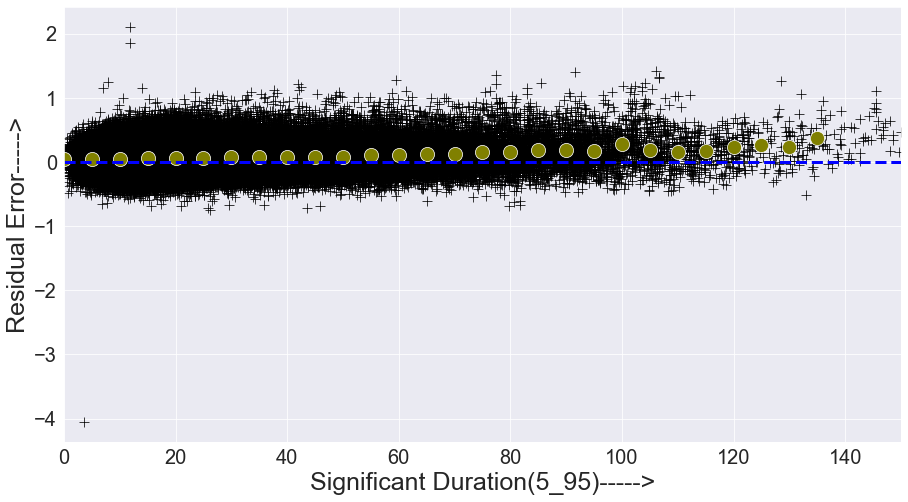

In [24]:
x=input_var['D5_95_']
y=residual['pga']
plt.figure(figsize=(15,8))
plt.hlines(y=0,xmin=0, xmax=250,color='blue',linestyle='--',lw=3)
#sns.scatterplot(d,a, marker='o', color='red',s=200)
sns.scatterplot(x,y, marker='+', color='black', s=90)
sns.scatterplot(c,a, marker='o',s=200,color= 'olive')
plt.ylabel('Residual Error----->', size=25)
plt.xlabel('Significant Duration(5_95)----->', size=25)
plt.xlim(0,150)
plt.tick_params(axis='both', which='major', labelsize=20)

In [25]:
print( "Mean of Training Data:", np.mean(y_train))
print( "Standard Deviation of Training Data:", np.std(y_train))

Mean of Training Data: 0.9739394424920447
Standard Deviation of Training Data: 1.2559604535242026


In [26]:
pred=model.predict(X_test)
pred.shape

(21397, 1)

In [27]:
print( "Mean of Test Data:", np.mean(pred))
print( "Standard Deviation of Test Data:", np.std(pred))

Mean of Test Data: 0.90335065
Standard Deviation of Test Data: 1.2698624
